<a href="https://colab.research.google.com/github/paubur/Data-Science-workshop/blob/master/notebooks/DM_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dane jako nowe złoto

### Skąd zdobyć dane?


##### Zbieranie i etykiekietowanie danych
*   Web scraping
*   Eksperymenty / obserwacje
*   i inne ...

##### Korzystanie z dostępnych źródeł:

*   http://archive.ics.uci.edu/ml/
*   https://www.kaggle.com/datasets
*   https://datasource.kapsarc.org/pages/home/
*   https://registry.opendata.aws/
*   https://www.reddit.com/r/datasets/
*   https://www.kdnuggets.com/datasets/
*   https://thewebminer.com/

In [0]:
!wget archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [0]:
import pandas as pd
df = pd.read_csv("/content/iris.data", header=None)
df.head()

##### Struktura danych używanych w uczeniu maszynowym

> Algorytmy uczenia maszynowego próbują dopasować funkcję, która dla odpowiednich wartości X (cech) będzie dawać rezultat w postaci Y (etykieta).

>>>`Y = f(X) + e`










In [0]:
# Cechy w zbiorze danych (funkcja head zwraca pierwsze 5 wierszy z danych)
df.iloc[:, 0:3].head()

In [0]:
# Etykiety w zbiorze danych
print(df[4].unique())

# Ilość wierszy dla każdej z etykiet
print(df[4].value_counts())

In [0]:
# Infromacje o zbiorze danych
df.info()
df.describe()

### Główne problemy uczenia maszynowego w kontekście danych

##### Niedobór danych uczących

> Wskażmy dziecku owoc, na przykład jabłko, którego kształt i kolor może być różny (ale to nadal jabłko). Po kilkukrotnym powtórzeniu dziecko  nauczy rozpoznawać jabłka.

> Techniki uczeni maszynowego zachowują się inaczej. Potrzebują dużego zbioru danych, który pozwoli wielokrotnie rozpatrzeć różne przypadki



##### Niereprezentatywne dane uczące

> Możemy wyobrazić sobie, że nasz algorytm próbuje przewidzieć ceny mieszkań w zależności od wysokości nad poziomem morza. Mamy zbiór danych dla Wrocławia i Poznania, który zawiera cechę wysokość n.p.m., a naszą etykietą jest cena.

> Ponieważ zbiór danych jest dla Wrocławia i Poznania dobrze będzie przewidywał ceny mieszkań w tych miastach i miastach o podobnym położeniu n.p.m. Natomiast nie przewidzimy cen mieszkań np. w Zakopanem, ponieważ zbiór cech może się tak znacząco różnić, że funkcja, którą próbujemy estymować wyglądać będzie zupełnie inaczej.



##### Dane kiepskiej jakości

> Dane zawierają błędy, elementy odstające czy szum. Czasami danych też po prostu brakuje (np. wyniki ankiety gdzie nie każdy podał swój wiek).

> Tak jak przy niedoborze danych uczących czy niereprezentatywnych danych uczących nie możemy za bardzo nic zrobić tak tutaj są już metody radzenia sobie z takimi danymi.

Odstające wartości

In [0]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(100, 2))
print(df.head())
df.plot.scatter(x=0, y=1)
plt.show()

df.at[0, 1] = 100
print(df.head())
df.plot.scatter(x=0, y=1)
plt.show()

Usuwanie odstających wartości

In [0]:
from scipy import stats

# Obliczamy Z-score dla każdej wartości w kolumnie w stosunku do średniej całej kolumny i odchylenia standardowego
# Obliczamy wartość bezwzględną z Z-score i sprawdzamy czy jest mniejsza niż threshold
# .all(axis=1) zapewnia nas, że każda kolumna w wierszu spełnia warunek

threshold = 4

df_w = df[(np.abs(stats.zscore(df)) < threshold).all(axis=1)]
df_w.plot.scatter(x=0, y=1)
plt.show()

Brakujące wartości

*   Usunięcie wierszy z brakującymi wartościami
*   Zastąpienie brakujących wartości



##### Nieistotne cechy

> Możemy wrócić do przykładu przewidywania ceny mieszkań w zależności od wysokości nad poziomem morza. Czy rzeczywiście możemy przewidzieć cenę mieszkania w zależności od wysokości n.p.m.?

> Ważnym procesem w uczeniu maszynowym jest inżynieria cech (ang. feature engineering)

Feature engineering składa się z:
*   feature selection - doboru najprzydatniejszych cech
*   feature extraction
  * uzyskiwanie wielu cech z istniejących cechy
  * łączenie wielu cech w celu uzyskania bardziej przydatnej cechy



In [0]:
dict_dates = {
    u'2012-06-08': 388,
    u'2012-06-09': 388,
    u'2012-06-10': 388,
    u'2012-06-11': 389,
    u'2012-06-12': 389,
    u'2012-06-13': 389}

df_dates = pd.DataFrame(list(dict_dates.items()), columns=['date', 'value'])
df_dates.head()

In [0]:
df_dates['year'] = pd.DatetimeIndex(df_dates['date']).year
df_dates['month'] = pd.DatetimeIndex(df_dates['date']).month
df_dates['day'] = pd.DatetimeIndex(df_dates['date']).day
df_dates['year_value'] = pd.DatetimeIndex(df_dates['date']).year/df_dates['value']
df_dates.head()

### Eksploracja i wizualizacja danych

Zadania
1.   Pobierz zbiór danych housing.csv dotyczący cen mieszkań w Kalifornii znajdujący się pod adresem: https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
2.   Wyświetl pierwsze 10 wierszy zbioru danych
3.   Przeanalizuj zbiór danych odpowiadając na pytania:
  * ile i jak nazywają się atrybuty (czyli kolumny)
  * jakiego typu dane zawiera każda z kolumn, czy jest jakaś kolumna zawierająca tekst
  * ile jest wszystkich wierszy
  * czy w zbiorze występują wartości niezdefiniowane NaN/Null i jeśli występują to w jakich kolumnach
  * jakie są wartości minimalne i maksymalne dla każdej z kolumn
4.    Sprawdz ile wierszy przypada dla każdej unikalnej wartości z kolumny "ocean_proximity"
5. W zbiorze danych utwórz nowe kolumny zawierające:
  * liczbę pokoji na rodzinę
  * przychód na rodzinę
  * liczbę sypialni na pokoje
  * zaludnienie (populację) przypadającą na rodzinę


Jeśli będziesz chciał dokładnie przeanalizować sobie ten zbiór danych jest on też dostępny na platformie Kaggle (jest tutaj np. opisane znaczenie nazw kolumn): https://www.kaggle.com/camnugent/california-housing-prices



In [0]:
# WRITE YOUR CODE HERE
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

In [0]:
housing_df = pd.read_csv("/content/housing.csv")
housing_df.head(10)

In [0]:
housing_df.info()

In [0]:
housing_df.describe()

In [0]:
housing_df['room_per_household'] = housing_df['total_bedrooms']/housing_df['households']
housing_df['income_per_household'] = (housing_df['median_income']/housing_df['households'])*1000
housing_df['bedroom_per_rooms'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']
housing_df.head(4)

##### Wizualizowanie danych geograficznych z użyciem zbioru danych housing.csv



In [0]:
# pamiętaj zmienić housing_df na nazwę zmiennej twojego zbioru danych
housing_df.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

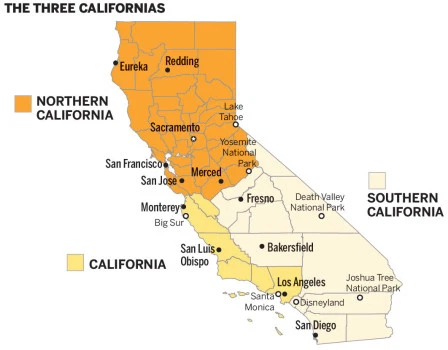

In [0]:
# lepsza wizualizacja skupienia próbek za pomocą parametru alpha
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [0]:
# wykres dodający ceny mieszakań
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing_df["population"]/100, label="Populacja", figsize=(10,7),
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()